# Linear Regression Models

## Predict individual medical costs billed by health insurance using both (Scikit-learn and Python form scratch implementation)

In [45]:
# Import needed packages
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Read data into a dataframe
df = pd.read_csv("insurance.csv")

# View a sample of the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Convert categorical data into numeric

In [47]:
df = pd.get_dummies(data=df, columns=['smoker', 'sex', 'region'], drop_first=True)
df.head()

,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0


### Find correlation between data to identify which columns affect charges

In [48]:
corr_matrix = df.corr()
corr_matrix

,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292,-0.039905,0.073982,-0.043210
smoker_yes,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185,-0.036945,0.068498,-0.036945
sex_male,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000,-0.011156,0.017117,-0.004184
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.036945,-0.011156,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.068498,0.017117,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.036945,-0.004184,-0.320829,-0.346265,1.000000


In [49]:
# View correlation between charges and other columns
corr_matrix['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
smoker_yes          0.787251
sex_male            0.057292
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

### To simplify the model, data with correlation absolute values less than 0.1 can be considered insignificant and so they can be dropped.

In [50]:
df.drop(['children', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1, inplace=True)

### We have age, bmi, and smoker_yes as the input data (X), and charges column has the output data (y).

## Linear regression model using Scikit-learn

In [53]:
# Build the model
X_train = df[['age','bmi','smoker_yes']]
y_train = df[['charges']]
line = linear_model.LinearRegression()
line = line.fit(X_train, y_train)

# Test the model using training dataset
y_pred = line.predict(X_train)
# Show real vs predicted results
print('Slope: ',line.coef_)
print('Intercept: ',line.intercept_, '\n')
print('Test:\n', X_train,'\nPredicted:\n', line.predict(X_train), '\n')
print('Real:\n', y_train, '\n')
print("R^2-score:", r2_score(y_train, y_pred))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred))

Slope:  [[  259.54749155   322.61513282 23823.68449531]]
Intercept:  [-11676.83042519] 

Test:
       age     bmi  smoker_yes
0      19  27.900           1
1      18  33.770           0
2      28  33.000           0
3      33  22.705           0
4      32  28.880           0
...   ...     ...         ...
1333   50  30.970           0
1334   18  31.920           0
1335   18  36.850           0
1336   21  25.800           0
1337   61  29.070           1

[1338 rows x 3 columns] 
Predicted:
 [[26079.21861526]
 [ 3889.73745805]
 [ 6236.79872129]
 ...
 [ 4883.39206713]
 [ 2097.13732413]
 [37357.67296584]] 

Real:
           charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns] 

R^2-score: 0.7474771588119513
Mean Squared Error: 37005395.750507504


### Note that R^2 score represents the normalized version of MSE (Mean Squared Error). MSE value was larger than expected because data were not normalized, which means that we can completely ignore the MSE value and consider the R^2 score as the true MSE value.

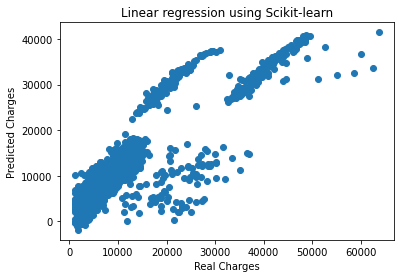

In [59]:
# Plot the results
plt.scatter(y_train, y_pred)
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear regression using Scikit-learn')
plt.show()

## Linear regression model using Python from scratch implemention

In [60]:
# Calculate mean and standard deviation of X
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [61]:
# Use the input training data and the learning rate alpha, with number of iterations T
def lin_regression(X, y, T, alpha):
    num_samples, num_features = X.shape

    # Initialize w and b values
    w = np.zeros((num_features, 1))
    b = 0

    # Find the gradients gW and gb
    for i in range(T):
        # Calculate predictions
        y_predict = np.dot(X, w) + b
        # Calculate gradients
        gw = np.dot(X.T, (y_predict - y)) / num_samples
        gb = np.sum(y_predict - y) / num_samples
        # Update model parameters
        w = w - alpha * gw.reshape(-1, 1)
        b = b - alpha * gb
    
    # Final solution
    y_predict = np.dot(X, w) + b
    return w, b, y_predict

In [62]:
X = df[['age','bmi','smoker_yes']]
y = df[['charges']]

X_norm, X_mean, X_std = normalize(X.values)
y_norm, y_mean, y_std = normalize(y.values.reshape(-1, 1))

alpha = 0.01 
T = 500

w, b, y_predict = lin_regression(X_norm, y_norm, T, alpha)
mse = np.mean(np.square(y_norm - y_predict))

# Denormalize the predicted and the real charges
y_predict_denorm = (y_predict * y_std) + y_mean.flatten()
y_denorm = (y_norm * y_std) + y_mean.flatten()

print("Slope:", w)
print("Intercept:", b)
print("Mean Squared Error:", mse)

Slope: [[0.29872034]
 [0.16266732]
 [0.78869716]]
Intercept: -2.721457007597603e-17
Mean Squared Error: 0.2525579082222526


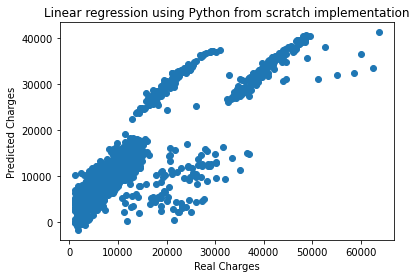

In [63]:
# Plot the results
plt.scatter(y_denorm, y_predict_denorm)
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear regression using Python from scratch implementation')
plt.show()

## Scikit-learn Vs Python from scratch:
### While both methods showed very similar graphs, the Mean Squared Error for Scikit-learn method was larger than that for Python from scratch implementation method by around 0.49. Considering the size of the dataset, this difference is almost insignificant. Which makes it fair to say that both models are close in terms of accuracy for this particular dataset.

### Scikit-learn method is much simpler, easier and faster in implementation due to its built-in functions.
### On the other hand, Python from scratch implementation allows more control and understanding of the underlying mathematical concepts.